# Illustration of CLA

## Imports 

In [1]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append('../')

In [4]:
from typing import List
import datetime
import tqdm
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import yfinance as yf


In [5]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
from  opm.cla import CriticalLineAlgorithm


In [7]:
def plot2D(x,y,xLabel='',yLabel='',title='',pathChart=None):
    import matplotlib.pyplot as mpl
    fig=mpl.figure()
    ax=fig.add_subplot(1,1,1) #one row, one column, first plot
    ax.plot(x,y,color='blue')
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel,rotation=90)
    mpl.xticks(rotation='vertical')
    mpl.title(title)
    if pathChart==None:
        mpl.show()
    else:
        mpl.savefig(pathChart)
    mpl.clf() # reset pylab
    return

In [8]:
#1) Path
path='CLA_Data.csv'
#2) Load data, set seed
headers=open(path,'r').readline().split(',')[:-1]
data=np.genfromtxt(path,delimiter=',',skip_header=1) # load as numpy array
mean=np.array(data[:1]).T
lB=np.array(data[1:2]).T
uB=np.array(data[2:3]).T
covar=np.array(data[3:])


In [9]:
data

array([[1.175     , 1.19      , 0.396     , 1.12      , 0.346     ,
        0.679     , 0.089     , 0.73      , 0.481     , 1.08      ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.40755159, 0.03175842, 0.05183923, 0.05663904, 0.0330226 ,
        0.00827775, 0.02165938, 0.01332419, 0.0343476 , 0.02249903],
       [0.03175842, 0.9063047 , 0.03136385, 0.02687256, 0.01917172,
        0.00934384, 0.02495043, 0.00761036, 0.02874874, 0.01336866],
       [0.05183923, 0.03136385, 0.19490901, 0.04408485, 0.03006772,
        0.01322738, 0.03525971, 0.0115493 , 0.0427563 , 0.02057303],
       [0.05663904, 0.02687256, 0.04408485, 0.19528471, 0.02777345,
        0.00526665, 0.01375808, 0.00780878, 0.02914176, 0.01640377],
       [0.0330226 , 0.01917172, 0.0300677

In [10]:
mean

array([[1.175],
       [1.19 ],
       [0.396],
       [1.12 ],
       [0.346],
       [0.679],
       [0.089],
       [0.73 ],
       [0.481],
       [1.08 ]])

In [11]:
covar

array([[0.40755159, 0.03175842, 0.05183923, 0.05663904, 0.0330226 ,
        0.00827775, 0.02165938, 0.01332419, 0.0343476 , 0.02249903],
       [0.03175842, 0.9063047 , 0.03136385, 0.02687256, 0.01917172,
        0.00934384, 0.02495043, 0.00761036, 0.02874874, 0.01336866],
       [0.05183923, 0.03136385, 0.19490901, 0.04408485, 0.03006772,
        0.01322738, 0.03525971, 0.0115493 , 0.0427563 , 0.02057303],
       [0.05663904, 0.02687256, 0.04408485, 0.19528471, 0.02777345,
        0.00526665, 0.01375808, 0.00780878, 0.02914176, 0.01640377],
       [0.0330226 , 0.01917172, 0.03006772, 0.02777345, 0.34059105,
        0.00777055, 0.02067844, 0.00736409, 0.02542657, 0.01284075],
       [0.00827775, 0.00934384, 0.01322738, 0.00526665, 0.00777055,
        0.15983874, 0.02105575, 0.00518686, 0.01723737, 0.00723779],
       [0.02165938, 0.02495043, 0.03525971, 0.01375808, 0.02067844,
        0.02105575, 0.68056711, 0.01377882, 0.04627027, 0.01926088],
       [0.01332419, 0.00761036, 0.0115493

In [12]:
#3) Invoke object

In [13]:

cla= CriticalLineAlgorithm (  mean = mean,
                 covariance = covar,
                 lower_bounds = lB,
                 upper_bounds = uB)
cla.solve()
print(cla.weights) # print all turning points

[array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[ 6.49369407e-01],
       [ 3.50630593e-01],
       [ 0.00000000e+00],
       [-3.55271368e-15],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]]), array([[ 4.33984134e-01],
       [ 2.31247501e-01],
       [ 0.00000000e+00],
       [ 3.34768365e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-3.55271368e-15]]), array([[1.26887854e-01],
       [7.23433472e-02],
       [0.00000000e+00],
       [2.81253749e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.77555756e-17],
       [0.0

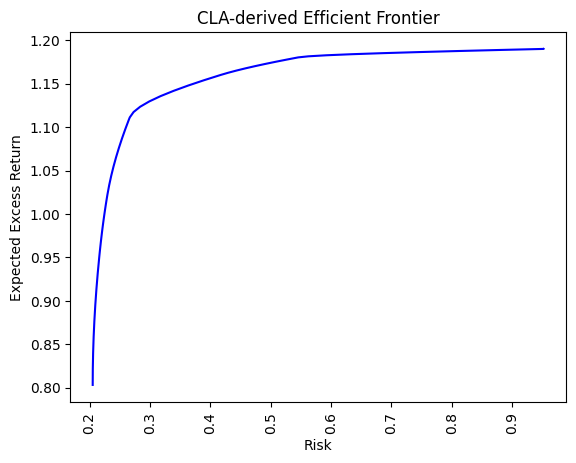

<Figure size 640x480 with 0 Axes>

In [14]:
#4) Plot frontier
mu,sigma,weights=cla.extract_efficient_frontier(100)
plot2D(sigma,mu,'Risk','Expected Excess Return','CLA-derived Efficient Frontier')

In [15]:
 


#5) Get Maximum Sharpe ratio portfolio
sr,w_sr=cla.get_maximum_sharpe_portfolio()
print(np.dot(np.dot(w_sr.T,cla.covariance),w_sr)[0,0]**.5)
print(sr)
print(w_sr)

   
    

0.22861727337558824
4.453065359613833
[[ 8.55305970e-02]
 [ 4.97111422e-02]
 [ 0.00000000e+00]
 [ 2.21146532e-01]
 [-6.70073794e-19]
 [ 1.77668135e-01]
 [ 0.00000000e+00]
 [ 3.07025386e-02]
 [ 4.00838454e-03]
 [ 4.31232670e-01]]


In [16]:
#6) Get Minimum Variance portfolio
mv,w_mv=cla.get_minimum_variance_portfolio()
print (mv)
print (w_mv)

[[0.20523762]]
[[0.03696858]
 [0.02690084]
 [0.09494243]
 [0.12577595]
 [0.07674608]
 [0.21935567]
 [0.0299871 ]
 [0.03596328]
 [0.06134984]
 [0.29201023]]


In [17]:
x,y,z,w_=[],[],[],[]
for i in range(len(cla.weights)-1):
    w0=np.copy(cla.weights[i])
    w1=np.copy(cla.weights[i+1])
    for a in np.linspace(1,0,10000):
        w=a*w0+(1-a)*w1
        w_.append(w)
        x.append(np.dot(np.dot(w.T,cla.covariance),w)[0,0]**.5)
        y.append(np.dot(w.T,cla.mean)[0,0])
        z.append(cla.get_sharpe_of_convex_combination(a,w0,w1))


In [18]:
print (max(y),w_[z.index(max(z))])

1.19 [[8.39733552e-02]
 [4.89060688e-02]
 [1.33448275e-18]
 [2.18309574e-01]
 [1.67690574e-03]
 [1.81200371e-01]
 [0.00000000e+00]
 [3.11830024e-02]
 [7.85868631e-03]
 [4.26892037e-01]]


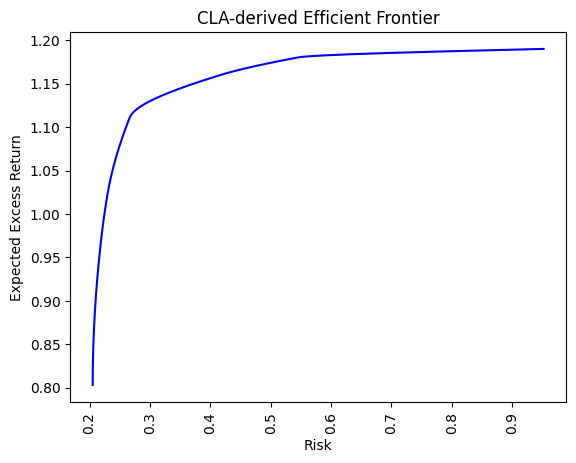

<Figure size 640x480 with 0 Axes>

In [19]:
plot2D(x,y,'Risk','Expected Excess Return','CLA-derived Efficient Frontier')

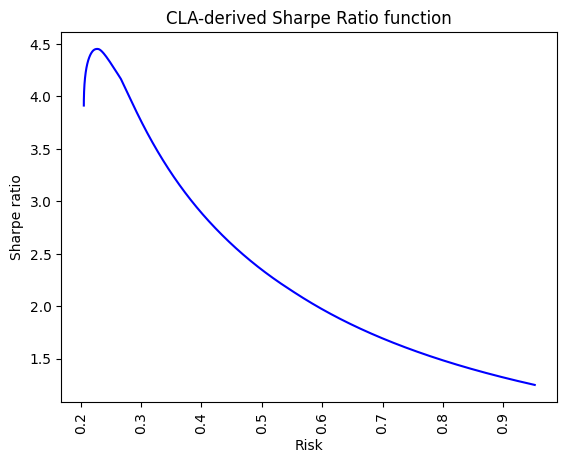

<Figure size 640x480 with 0 Axes>

In [20]:
plot2D(x,z,'Risk','Sharpe ratio','CLA-derived Sharpe Ratio function')
